In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# ### Loop the data lines
# with open("taxitrip.csv", 'r') as temp_f:
#     # get No of columns in each line
#     col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

# ### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
# column_names = [i for i in range(0, max(col_count))]

# ### Read csv
# df = pd.read_csv("taxitrip.csv", header=None, delimiter=",", names=column_names)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib inline
plt.style.use('seaborn-whitegrid')

In [ ]:
df_train =  pd.read_csv('train.csv', nrows = 2_000_000)
# list first few rows (datapoints)
df_train.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [ ]:
df_train.dtypes

VendorID                 float64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

In [ ]:
df_train.describe()


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,51173.000000,51173.000000,83691.000000,83691.000000,51173.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,0.0,83691.000000,83691.000000,51173.000000,51173.000000,51173.000000
mean,1.851113,1.159244,108.362572,133.270005,1.307858,194.354699,20.388305,1.156707,0.293562,1.058618,0.624529,NaN,0.297745,24.204836,1.421726,1.034393,0.642815
std,0.355981,0.773260,70.370170,77.216791,0.984362,4405.549221,15.583552,1.367897,0.247773,2.368771,1.990481,NaN,0.031219,17.262183,0.511146,0.182239,1.164219
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-150.000000,-4.500000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,56.000000,69.000000,1.000000,1.350000,9.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.300000,11.760000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.760000,16.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,19.800000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,205.000000,1.000000,6.200000,26.830000,2.750000,0.500000,1.660000,0.000000,NaN,0.300000,31.300000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,260517.930000,480.000000,8.250000,0.500000,87.710000,30.050000,NaN,0.300000,480.310000,5.000000,2.000000,2.750000


In [ ]:
df_train.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,51173.000000,51173.000000,83691.000000,83691.000000,51173.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,0.0,83691.000000,83691.000000,51173.000000,51173.000000,51173.000000
mean,1.851113,1.159244,108.362572,133.270005,1.307858,194.354699,20.388305,1.156707,0.293562,1.058618,0.624529,NaN,0.297745,24.204836,1.421726,1.034393,0.642815
std,0.355981,0.773260,70.370170,77.216791,0.984362,4405.549221,15.583552,1.367897,0.247773,2.368771,1.990481,NaN,0.031219,17.262183,0.511146,0.182239,1.164219
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-150.000000,-4.500000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,56.000000,69.000000,1.000000,1.350000,9.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.300000,11.760000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.760000,16.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,19.800000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,205.000000,1.000000,6.200000,26.830000,2.750000,0.500000,1.660000,0.000000,NaN,0.300000,31.300000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,260517.930000,480.000000,8.250000,0.500000,87.710000,30.050000,NaN,0.300000,480.310000,5.000000,2.000000,2.750000


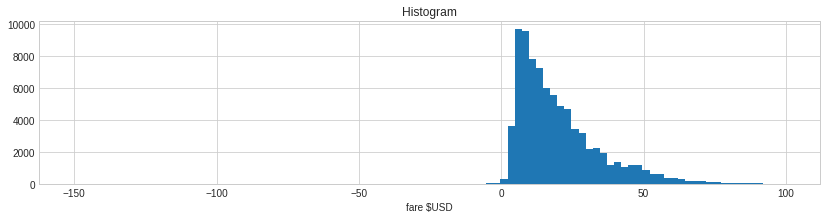

In [ ]:
# plot histogram of fare
df_train[df_train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

Visualization

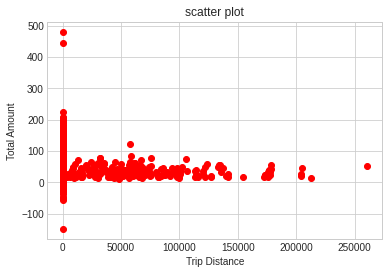

In [ ]:
plt.scatter(df_train['trip_distance'],df_train['total_amount'], color='red')
plt.title("scatter plot")
plt.xlabel("Trip Distance")
plt.ylabel("Total Amount")
plt.show()

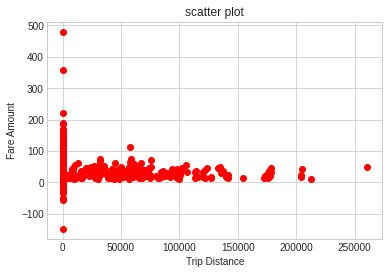

In [ ]:
plt.scatter(df_train['trip_distance'],df_train['fare_amount'], color='red')
plt.title("scatter plot")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.show()

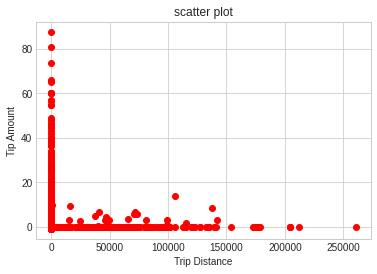

In [ ]:
plt.scatter(df_train['trip_distance'],df_train['tip_amount'], color='red')
plt.title("scatter plot")
plt.xlabel("Trip Distance")
plt.ylabel("Tip Amount")
plt.show()

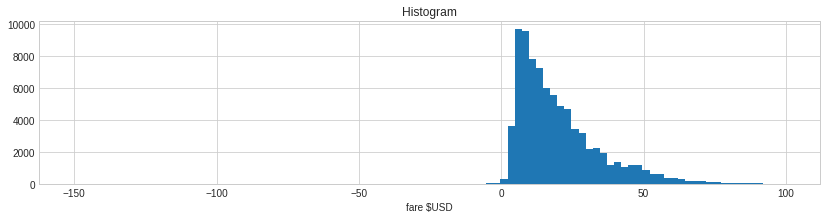

In [ ]:
df_train[df_train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

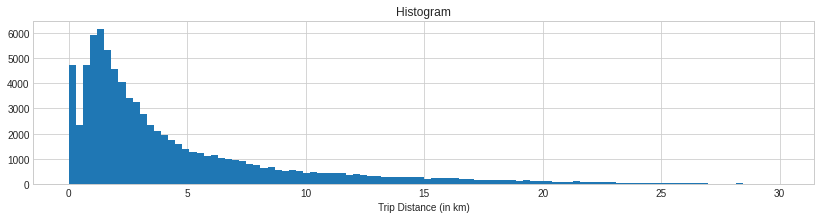

In [ ]:
df_train[df_train.trip_distance<30].trip_distance.hist(bins=100, figsize=(14,3))
plt.xlabel('Trip Distance (in km)')
plt.title('Histogram');

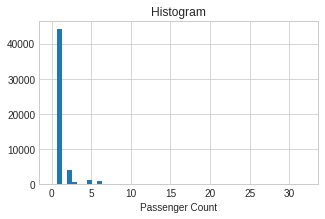

In [ ]:
df_train[df_train.passenger_count<100].passenger_count.hist(bins=50, figsize=(5,3))
plt.xlabel('Passenger Count')
plt.title('Histogram');

Text(0.5, 1.0, 'Box Plot')

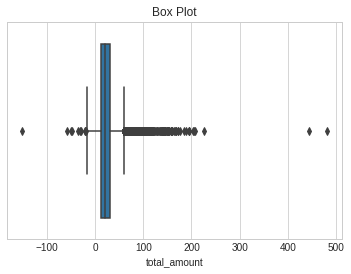

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.boxplot(x="total_amount", data=df_train)
plt.title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

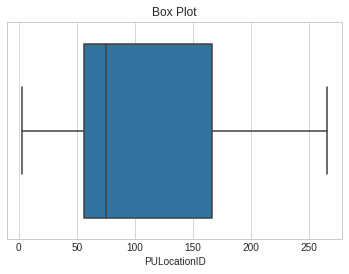

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.boxplot(x="PULocationID", data=df_train)
plt.title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

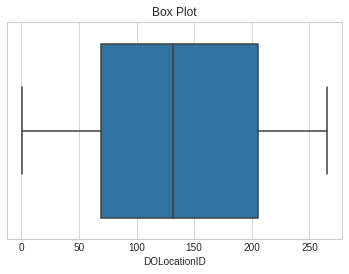

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.boxplot(x="DOLocationID", data=df_train)
plt.title("Box Plot")

In [ ]:
print(df_train.isnull().sum())

VendorID                 32518
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       32518
RatecodeID               32518
PULocationID                 0
DOLocationID                 0
passenger_count          32518
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                83691
improvement_surcharge        0
total_amount                 0
payment_type             32518
trip_type                32518
congestion_surcharge     32518
dtype: int64


In [ ]:
df_train.groupby('trip_distance').mean()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
trip_distance,,,,,,,,,,,,,,,,
0.00,1.4597,1.755350,134.659913,145.273517,1.091298,18.292200,0.511389,0.298408,0.635910,0.489485,NaN,0.274298,20.575974,1.319187,1.174394,0.036287
0.01,2.0000,2.165138,118.525000,126.206250,1.229358,12.652188,0.968750,0.209375,0.615313,0.038250,NaN,0.277500,14.778563,1.779817,1.275229,0.025229
0.02,2.0000,2.153846,109.277228,110.554455,1.323077,15.559208,1.126238,0.212871,0.510396,0.024257,NaN,0.288119,17.721089,1.738462,1.246154,0.000000
0.03,2.0000,2.017857,101.753623,106.260870,1.410714,13.077971,0.612319,0.260870,0.342754,0.000000,NaN,0.273913,14.607681,1.892857,1.178571,0.000000
0.04,2.0000,1.867925,106.261538,110.323077,1.320755,9.048923,0.719231,0.184615,0.267385,0.000000,NaN,0.203077,10.423231,2.037736,1.188679,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204048.30,NaN,NaN,218.000000,218.000000,NaN,18.580000,2.750000,0.000000,0.000000,0.000000,NaN,0.300000,21.630000,NaN,NaN,NaN
204333.20,NaN,NaN,210.000000,76.000000,NaN,24.710000,0.000000,0.000000,0.000000,0.000000,NaN,0.300000,25.010000,NaN,NaN,NaN
204624.55,NaN,NaN,262.000000,81.000000,NaN,41.430000,2.750000,0.000000,0.000000,0.000000,NaN,0.300000,44.480000,NaN,NaN,NaN


In [ ]:
df_train=df_train.fillna(df_train.groupby('trip_distance').transform('mean'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  """Entry point for launching an IPython kernel.


In [ ]:
df_train

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.000000,1.20,6.00,0.50,0.5,0.00,0.00,NaN,0.3,7.30,2.00,1.0,0.000000
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.000000,13.69,42.00,0.50,0.5,0.00,0.00,NaN,0.3,43.30,2.00,1.0,0.000000
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.000000,0.95,6.50,0.50,0.5,2.34,0.00,NaN,0.3,10.14,1.00,1.0,0.000000
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.000000,1.24,6.50,0.50,0.5,0.00,0.00,NaN,0.3,7.80,2.00,1.0,0.000000
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.000000,1.10,7.00,0.50,0.5,0.00,0.00,NaN,0.3,8.30,2.00,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,2.0,2021-07-02 07:59:00,2021-07-02 08:33:00,NaN,1.7,218,169,1.300000,18.04,50.24,2.75,0.0,0.00,6.55,NaN,0.3,59.84,1.20,1.0,0.275000
83687,2.0,2021-07-02 07:02:00,2021-07-02 07:18:00,NaN,1.0,74,137,1.125000,5.56,19.16,0.00,0.0,3.66,0.00,NaN,0.3,25.87,1.50,1.0,1.546875
83688,2.0,2021-07-02 07:53:00,2021-07-02 08:15:00,NaN,1.0,69,75,1.166667,5.13,22.45,0.00,0.0,0.00,0.00,NaN,0.3,22.75,1.25,1.0,1.375000
83689,2.0,2021-07-02 07:58:00,2021-07-02 08:30:00,NaN,1.0,117,82,1.500000,12.58,48.62,2.75,0.0,0.00,2.45,NaN,0.3,54.12,1.00,1.0,0.687500


In [ ]:
df_train=df_train.drop('store_and_fwd_flag',axis=1)


In [ ]:
print('Old size: %d' % len(df_train))
df_train = df_train[df_train.fare_amount>=0]
print('New size: %d' % len(df_train))

Old size: 83691
New size: 83546


In [ ]:
df_train

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,74,168,1.000000,1.20,6.00,0.50,0.5,0.00,0.00,NaN,0.3,7.30,2.00,1.0,0.000000
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,116,265,2.000000,13.69,42.00,0.50,0.5,0.00,0.00,NaN,0.3,43.30,2.00,1.0,0.000000
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,97,33,1.000000,0.95,6.50,0.50,0.5,2.34,0.00,NaN,0.3,10.14,1.00,1.0,0.000000
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,74,42,1.000000,1.24,6.50,0.50,0.5,0.00,0.00,NaN,0.3,7.80,2.00,1.0,0.000000
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,42,244,1.000000,1.10,7.00,0.50,0.5,0.00,0.00,NaN,0.3,8.30,2.00,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,2.0,2021-07-02 07:59:00,2021-07-02 08:33:00,1.7,218,169,1.300000,18.04,50.24,2.75,0.0,0.00,6.55,NaN,0.3,59.84,1.20,1.0,0.275000
83687,2.0,2021-07-02 07:02:00,2021-07-02 07:18:00,1.0,74,137,1.125000,5.56,19.16,0.00,0.0,3.66,0.00,NaN,0.3,25.87,1.50,1.0,1.546875
83688,2.0,2021-07-02 07:53:00,2021-07-02 08:15:00,1.0,69,75,1.166667,5.13,22.45,0.00,0.0,0.00,0.00,NaN,0.3,22.75,1.25,1.0,1.375000
83689,2.0,2021-07-02 07:58:00,2021-07-02 08:30:00,1.0,117,82,1.500000,12.58,48.62,2.75,0.0,0.00,2.45,NaN,0.3,54.12,1.00,1.0,0.687500


In [ ]:
df_train=df_train.drop('ehail_fee',axis=1)
df_train=df_train.drop('lpep_pickup_datetime',axis=1)
df_train=df_train.drop('lpep_dropoff_datetime',axis=1)


df_train

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,1.0,74,168,1.000000,1.20,6.00,0.50,0.5,0.00,0.00,0.3,7.30,2.00,1.0,0.000000
1,2.0,1.0,116,265,2.000000,13.69,42.00,0.50,0.5,0.00,0.00,0.3,43.30,2.00,1.0,0.000000
2,2.0,1.0,97,33,1.000000,0.95,6.50,0.50,0.5,2.34,0.00,0.3,10.14,1.00,1.0,0.000000
3,2.0,1.0,74,42,1.000000,1.24,6.50,0.50,0.5,0.00,0.00,0.3,7.80,2.00,1.0,0.000000
4,2.0,1.0,42,244,1.000000,1.10,7.00,0.50,0.5,0.00,0.00,0.3,8.30,2.00,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,2.0,1.7,218,169,1.300000,18.04,50.24,2.75,0.0,0.00,6.55,0.3,59.84,1.20,1.0,0.275000
83687,2.0,1.0,74,137,1.125000,5.56,19.16,0.00,0.0,3.66,0.00,0.3,25.87,1.50,1.0,1.546875
83688,2.0,1.0,69,75,1.166667,5.13,22.45,0.00,0.0,0.00,0.00,0.3,22.75,1.25,1.0,1.375000
83689,2.0,1.0,117,82,1.500000,12.58,48.62,2.75,0.0,0.00,2.45,0.3,54.12,1.00,1.0,0.687500


In [ ]:
print(df_train.isnull().sum())

VendorID                 1259
RatecodeID               1259
PULocationID                0
DOLocationID                0
passenger_count          1259
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             1259
trip_type                1259
congestion_surcharge     1259
dtype: int64


In [ ]:
df_train = df_train.fillna(df_train.median())

In [ ]:
print(df_train.isnull().sum())

VendorID                 0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64


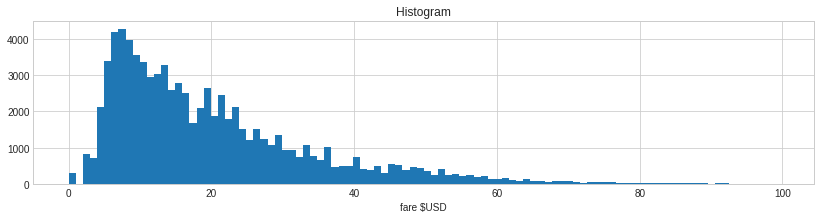

In [ ]:
# plot histogram of fare
df_train[df_train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

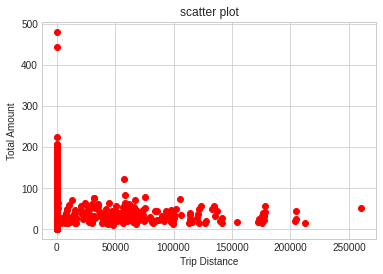

In [ ]:
plt.scatter(df_train['trip_distance'],df_train['total_amount'], color='red')
plt.title("scatter plot")
plt.xlabel("Trip Distance")
plt.ylabel("Total Amount")
plt.show()

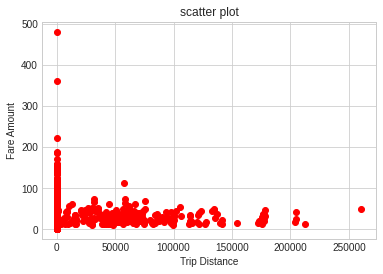

In [ ]:
plt.scatter(df_train['trip_distance'],df_train['fare_amount'], color='red')
plt.title("scatter plot")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.show()

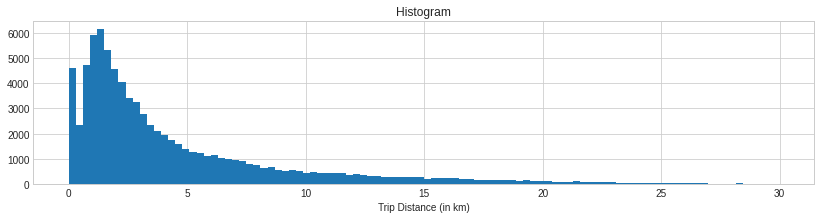

In [ ]:
df_train[df_train.trip_distance<30].trip_distance.hist(bins=100, figsize=(14,3))
plt.xlabel('Trip Distance (in km)')
plt.title('Histogram');

In [ ]:
x=df_train.drop(['total_amount'],axis = 1)
y=df_train['total_amount']
y

0         7.30
1        43.30
2        10.14
3         7.80
4         8.30
         ...  
83686    59.84
83687    25.87
83688    22.75
83689    54.12
83690    48.89
Name: total_amount, Length: 83546, dtype: float64

In [ ]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

x= scaler.fit_transform(x)
x

NameError: ignored

In [ ]:
# # example of a normalization
# from numpy import asarray
# from sklearn.preprocessing import MinMaxScaler
# scaler= MinMaxScaler()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#No need to drop any columns since the Pearson Correlations are upwards 0.2 (medium relations)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #80% for Training and 20% for Testing
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(66836, 15) (16710, 15) (66836,) (16710,)


In [ ]:
from sklearn import ensemble
df_predict = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [ ]:
df_predict.fit(x_train, y_train)

GradientBoostingRegressor(loss='ls', max_depth=5)

In [ ]:
df_predict_test=df_predict.predict(x_test)
df_predict_train=df_predict.predict(x_train)
pd.DataFrame({'actual unseen data':y_train,'predicted unseen data':df_predict_train})-------------------------------------  0.


.........


,actual unseen data,predicted unseen data
45268,8.30,8.276285
27661,7.56,7.476115
41579,15.30,14.993372
45756,4.30,4.337368
31392,16.26,16.438959
...,...,...
31936,11.80,10.779260
64417,16.91,18.006696
30230,5.30,5.305529
15516,11.30,11.427288


In [ ]:
scores = cross_val_score(df_predict, x_test, y_test, cv=5)
scores

array([0.99892233, 0.9989057 , 0.99398832, 0.93726267, 0.9978924 ])

In [ ]:
predictions = cross_val_predict(df_predict, x_test, y_test, cv=5)
accuracy = metrics.r2_score(y_test, predictions)
accuracy

0.983916959935817

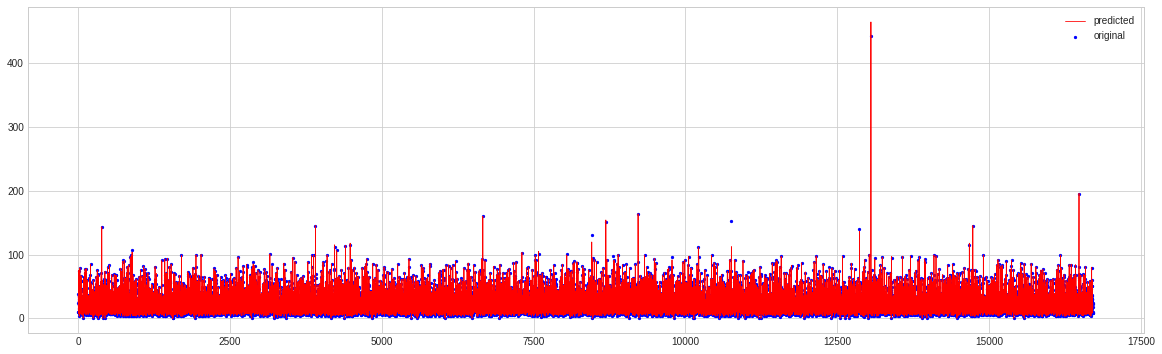

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, df_predict_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
print('MAE= ',metrics.mean_absolute_error(y_test,df_predict_test))
print('MSE= ',metrics.mean_squared_error(y_test,df_predict_test))
print('R2 value= ',df_predict.score(x_test,y_test))
print('Adjusted R2 value= ',1 - (1 - (df_predict.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,df_predict_train)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,df_predict_test)))

MAE=  0.2643833352910766
MSE=  0.471513715842156
R2 value=  0.9984364867629286
Adjusted R2 value=  0.9984155000080686
RMSE (train)=  0.3923853209502581
RMSE (test)=  0.6866685633128664
